# Intializing the circuit with $|1\rangle$

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from cmath import sqrt, pi, exp
sim = Aer.get_backend('aer_simulator')

First we try to intialize one qubit circuit with state $|1\rangle$ as follows,

In [2]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]
qc.initialize(initial_state, 0)

Now we find the vector representation of above circuit as follows,

In [3]:
sim = Aer.get_backend('aer_simulator') 
qc.save_statevector()         ## this converts output in to state vector
qobj = assemble(qc)           ## this assembles quantum circuit
job = sim.run(qobj)         ## this is for running the job
ket = job.result().get_statevector()
print(ket)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


Now we measure to check the output,

In [4]:
qc.measure_all()
qc.draw()

┌─────────────────┐ statevector  ░ ┌─┐
     q: ┤ Initialize(0,1) ├──────░───────░─┤M├
        └─────────────────┘      ░       ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

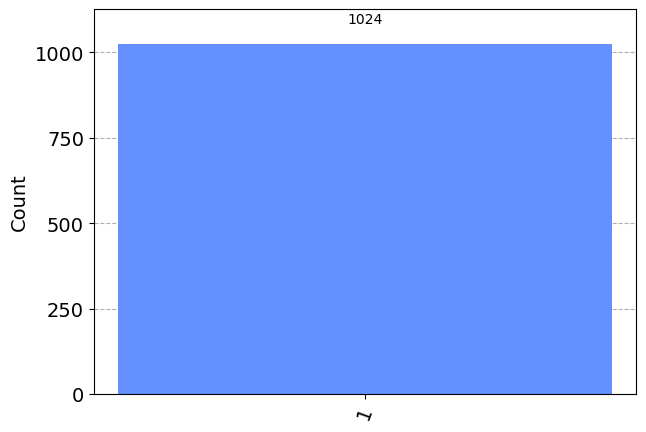

In [5]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

# Intializing the circuit with $\frac{|0\rangle+|1\rangle}{\sqrt{2}}$

In [6]:
qc1 = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [1/sqrt(2),1/sqrt(2)]   # Define initial_state as |1>
qc1.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc1.draw()  # Let's view our circuit

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

In [7]:
sim = Aer.get_backend('aer_simulator') 
qc1.save_statevector()         ## this converts output in to state vector
qobj = assemble(qc1)           ## this assembles quantum circuit
job = sim.run(qobj)         ## this is for running the job
ket = job.result().get_statevector()
print(ket)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [8]:
qc1.measure_all()
qc1.draw()

┌─────────────────────────────┐ statevector  ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├──────░───────░─┤M├
        └─────────────────────────────┘      ░       ░ └╥┘
meas: 1/════════════════════════════════════════════════╩═
                                                        0

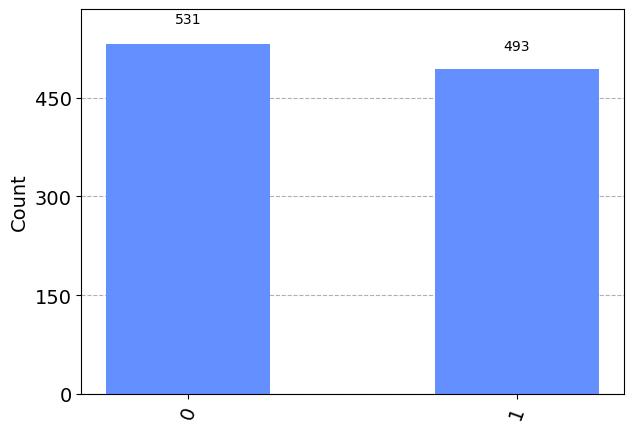

In [9]:
qobj = assemble(qc1)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

## Quick Exercise

1. Create a state vector that will give a  1/3 probability of measuring $|0\rangle$.

In [10]:
state1 = [1/sqrt(3),sqrt(2/3)]

2. Create a different state vector that will give the same measurement probabilities.

In [11]:

i=complex(0,1)
state2 = [exp(-i*pi)*1/sqrt(3),exp(-i*pi)*sqrt(2/3)] ## adding a global phase never changes the probabilities.

3. Verify that the probability of measuring $|1\rangle$ for these two states is 2/3.

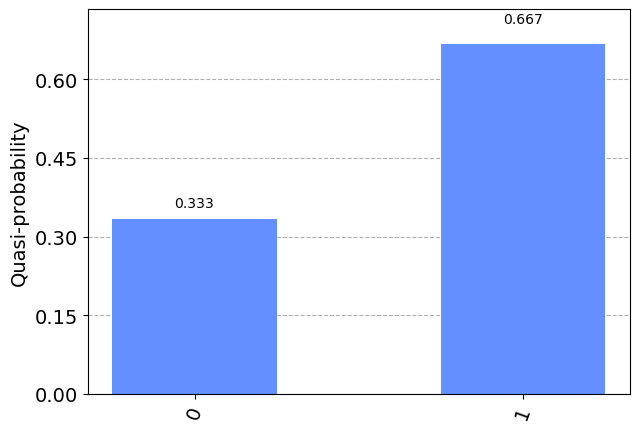

In [12]:
initial_state = state1  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

Statevector([-0.57735027-7.07050159e-17j, -0.81649658-9.99919924e-17j],
            dims=(2,))


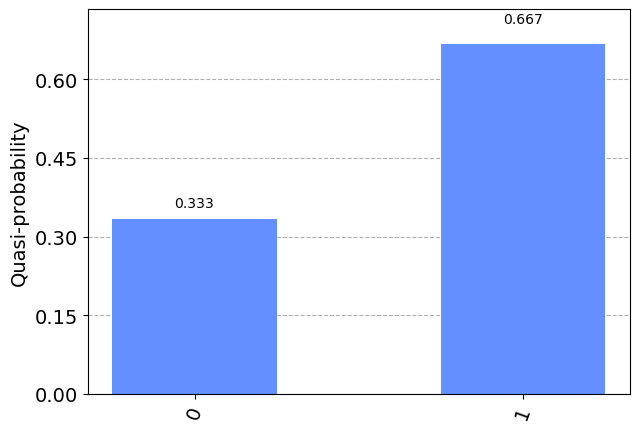

In [13]:
initial_state = state2  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

# Visually represnting qubit state using Bloch sphere

Any state on bloch sphere can be represnted by three paramtere, $r=1$, $\theta$ and $\phi$ as follows,

<div class='math'>
\begin{equation}
|\psi\rangle=\cos\frac{\theta}{2}|0\rangle+e^{\dot{\iota}\phi}\sin\frac{\theta}{2}|1\rangle
\end{equation}
</div>

We represent $|+\rangle$ on Bloch sphere as follows,

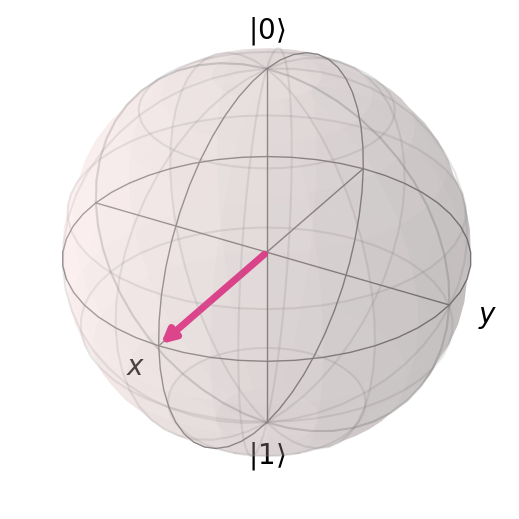

In [14]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

## Quick Exercise

Use plot_bloch_vector() or plot_bloch_sphere_spherical() to plot a qubit in the states:

1. $|0\rangle$

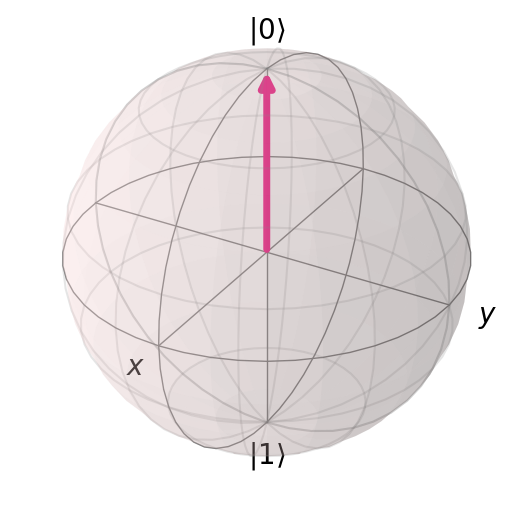

In [15]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [2*pi,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

2. $|1\rangle$


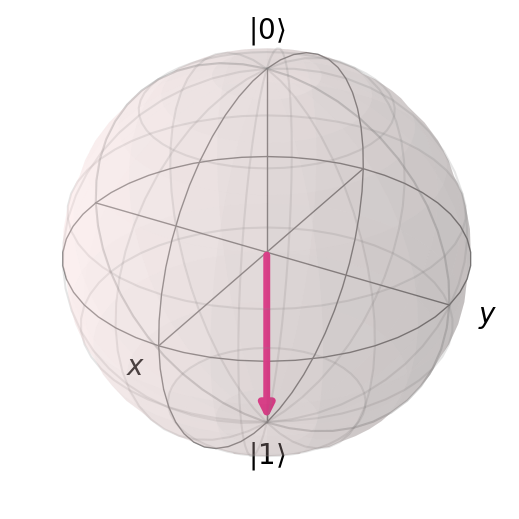

In [16]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates



3. $\frac{|0\rangle+|1\rangle}{\sqrt{2}}$


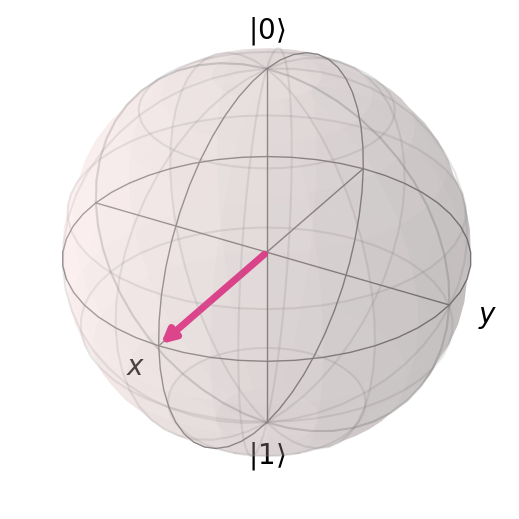

In [17]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates


4. $\frac{|0\rangle-\dot{\iota}|1\rangle}{\sqrt{2}}$


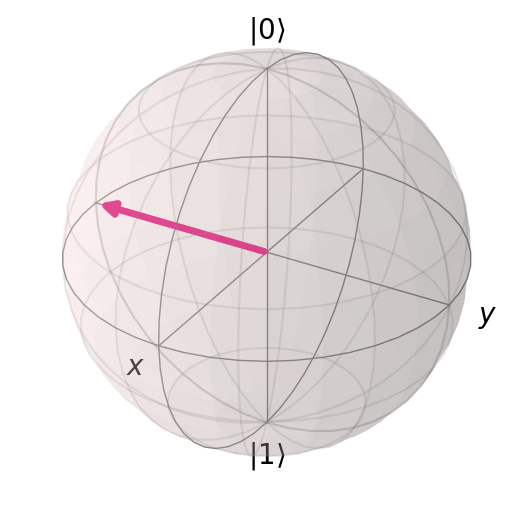

In [18]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,-pi/2,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

